# Исследование надежности заемщиков.

Данное исследование ставит перед собой цель проверить:

&emsp; 1. Как количество детей влияет на возврат кредита в срок


&emsp; 2. Есть ли зависимость между семейным положением и возвратом кредита в срок


&emsp; 3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок


&emsp; 4. Как разные цели кредита влияют на его возврат в срок

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.


**Структура данных:**


Данные о заемщиках находятся в файле `banking_data.csv`:

* `children` — количество детей в семье


* `days_employed` — общий трудовой стаж в днях


* `dob_years` — возраст


* `education` — уровень образования клиента


* `education_id` — идентификатор уровня образования


* `family_status` — семейное положение


* `family_status_id` — идентификатор семейного положения


* `gender` — пол клиента


* `income_type` — тип занятости


* `debt` — имел ли задолжность по возврату кредита


* `total_income` — ежемесячный доход


* `purpose` — цель получения кредита

**План:**

<div class="toc">
   <ul class="toc-item">
      <li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span></li>
      <li>
         <span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3">Предобработка данных</a></span>
         <ul class="toc-item">
            <li><span><a href="#Обработка-аномалий" data-toc-modified-id="Обработка-аномалий-3.1">Обработка аномалий</a></span></li>
            <li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-3.2">Удаление дубликатов</a></span></li>
            <li><span><a href="#Декомпозиция-данных" data-toc-modified-id="Декомпозиция-данных-3.3">Декомпозиция данных</a></span></li>
            <li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-3.4">Заполнение пропусков</a></span></li>
         </ul>
      </li>
      <li>
         <span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4">Исследовательский анализ данных</a></span>
         <ul class="toc-item">
            <li><span><a href="#Количество-детей" data-toc-modified-id="Количество-детей-4.1">Количество детей</a></span></li>
            <li><span><a href="#Семейное-положение" data-toc-modified-id="Семейное-положение-4.2">Семейное положение</a></span></li>
            <li><span><a href="#Уровень-дохода" data-toc-modified-id="Уровень-дохода-4.3">Уровень дохода</a></span></li>
            <li><span><a href="#Цели-кредита" data-toc-modified-id="Цели-кредита-4.4">Цели кредита</a></span></li>
         </ul>
      </li>
      <li><span><a href="#Итог" data-toc-modified-id="Итог-5">Итог</a></span></li>
   </ul>
</div>

# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

In [2]:
np.random.seed(42)
set_matplotlib_formats("svg")
sns.set_theme(font_scale=1.25, rc={"figure.figsize": (9, 6)}, palette="crest", style="whitegrid")

# Предобработка данных

In [3]:
data = pd.read_csv("banking_data.csv")
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [4]:
data.rename(columns={"dob_years": "age"}, inplace=True)

In [5]:
# пропущенных значений в столбце gender - 1
data["gender"].replace("XNA", data["gender"].mode()[0], inplace=True)
data["is_male"] = (data["gender"] == "M").astype("int8")
data.drop(columns="gender", inplace=True)

In [6]:
# замена странных значений
data["children"].replace({20: 2, -1: 1}, inplace=True)
data["age"].replace(0, data["age"].mode()[0], inplace=True)

Не особо хорошо заменять все пропущенные значения возраста на общую медиану, так как можно сделать оценку более точной, используя, например, столбец `income_type`, но пропущенных значений всего 101 (~0.5% данных), так что я не буду этого делать.

Насчет того, почему заполнять средним, медианным или модой - логично. На самом деле, это не всегда логично, а делается это из предположения, что данные зачастую имеют нормальное распределение. В общем случае, мы хотим заменить пропущенные значения на такое значение X, что P(X | D), где P - функция вероятности (или плотности вероятности при непрерывных данных), а D - имеющиеся данные, имеет максимальное значение. В случае нормального распределения, пик плотности вероятности приходится как раз на среднее значение (в общем-то это не случайно, а из-за того, как нормальное распределение выводится). А так как очень многие величины (например, возраст или доход) имеют нормальное распределение, то принятно использовать среднее, медиану и моду. Хотя, конечно, если бы данные имели бы, например, лог-равномерное распределение, то использовать среднее было бы уже не очень хорошо.

Посмотрев на количество различных значений в столбце `purpose`, захотелось использовать какую-нибудь кластеризацию, чтобы это все разбить на категории. Но тут в принципе, можно и руками. Но мне кажется, в реальности пришлось бы реализовывать модель кластеризации.

In [7]:
def categorize_purpose(value):
    if "свадьб" in value:
        return "проведение свадьбы"
    if any(word in value for word in ["недви", "жил"]):
        return "операции с недвижимостью"
    if "автомоб" in value:
        return "операции с автомобилем"
    if "образов" in value:
        return "получение образования"

In [8]:
data["purpose_category"] = data["purpose"].apply(categorize_purpose)
data.drop(columns="purpose", inplace=True)

## Обработка аномалий

In [9]:
data["days_employed"] = data["days_employed"].abs()

В столбце `days_employed` присутствуют подозрительно большие числа - порядка сотен тысяч. Однако обычно люди не живут 1000 лет. После небольшого анализа я выявил, что почти все такие клиенты - пенсионеры. Возможно, они ошиблись при заполнении данных, или источник, который предоставлял данные за пенсионеров, неправильно выгрузил данные. Скорее всего, второе, потому что если посмотреть на сырые данные, то отрицательные значения были у всех, кроме как раз вот этих "долгожителей". Следовательно, вероятно, было 2 источника данных, и один выгрузил данные с минусом, а второй данные, которые на 2 порядка больше. Почему на ошибка на 2 порядка, а не, например, данные просто отгружены в часовом формате? Если они в часах, то средний стаж будет 40 лет - все равно много больше среднего.

In [10]:
data[data["days_employed"] > 2 * 10**5]["income_type"].value_counts()

пенсионер      3443
безработный       2
Name: income_type, dtype: int64

У 2 безработных стаж работы порядка 1000 лет. Иронично...

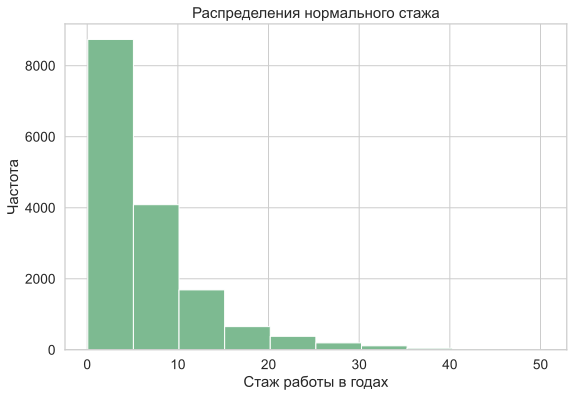

In [11]:
ax = (data[data["days_employed"] < 2 * 10**5]["days_employed"] / 365).plot(kind="hist")
ax.set(xlabel="Стаж работы в годах", ylabel="Частота", title="Распределения нормального стажа");

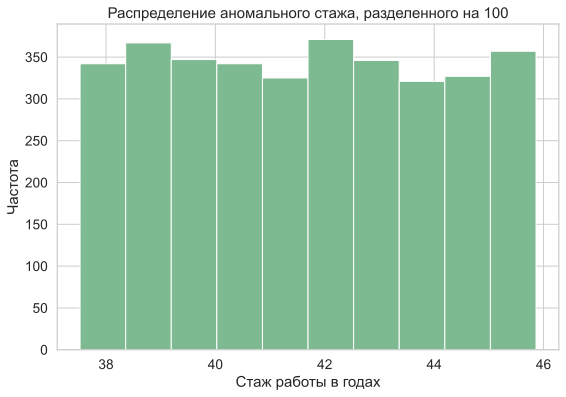

In [12]:
ax = (data.loc[data["days_employed"] > 2 * 10**5, "days_employed"] / (24 * 365)).plot(kind="hist")
ax.set(xlabel="Стаж работы в годах", ylabel="Частота", title="Распределение аномального стажа, разделенного на 100");

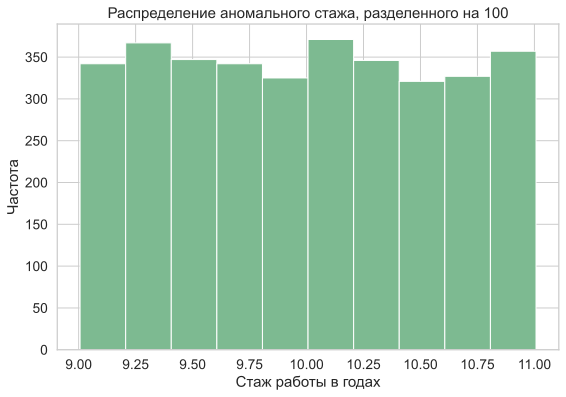

In [13]:
ax = (data.loc[data["days_employed"] > 2 * 10**5, "days_employed"] / (100 * 365)).plot(kind="hist")
ax.set(xlabel="Стаж работы в годах", ylabel="Частота", title="Распределение аномального стажа, разделенного на 100");

Проверим, насколько это вообще реально — пожилому человеку (не пенсионеру, так как там испорченные данные) иметь стаж порядка 40 лет.

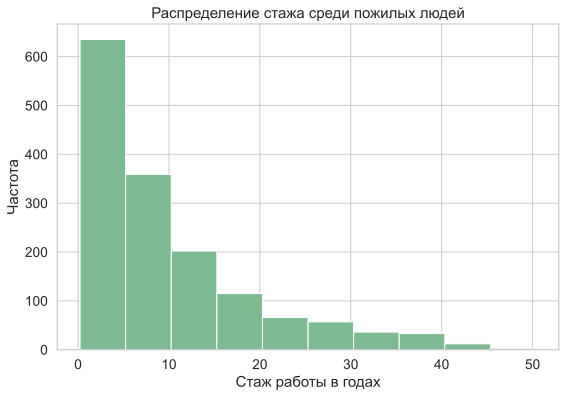

In [14]:
ax = (data.query('age >= 55 and not income_type == "пенсионер"')["days_employed"] / 365).plot(kind="hist")
ax.set(xlabel="Стаж работы в годах", ylabel="Частота", title="Распределение стажа среди пожилых людей");

Видим, что распределение стажа среди пожилых людей почти ничем не отличается от распределения всех людей, и, следовательно, иметь стаж порядка 40 лет - весьма редкое явление даже среди пожилых людей. Так что разделим их стаж на 100, а не на 24.

In [15]:
data.loc[data["days_employed"] > 2 * 10**5, "days_employed"] /= 100

Кстати, интересная ошибка в данных – пенсионеры до 30 лет:

In [16]:
data.query('income_type == "пенсионер" and age < 30')

,children,days_employed,age,education,education_id,family_status,family_status_id,income_type,debt,total_income,is_male,purpose_category
1242,0,3347.642598,22,Среднее,1,Не женат / не замужем,4,пенсионер,0,89368.600062,0,получение образования
3619,0,NaN,24,среднее,1,женат / замужем,0,пенсионер,0,NaN,0,операции с недвижимостью
12507,0,3794.921025,27,среднее,1,Не женат / не замужем,4,пенсионер,0,50969.340462,0,операции с автомобилем
12753,1,3297.817050,27,среднее,1,женат / замужем,0,пенсионер,0,65198.102341,0,получение образования
13953,0,3768.245858,27,среднее,1,в разводе,3,пенсионер,0,97961.993557,1,операции с недвижимостью
16166,0,3643.481974,26,среднее,1,гражданский брак,1,пенсионер,0,80044.196101,1,операции с автомобилем
19417,1,3503.407602,28,среднее,1,в разводе,3,пенсионер,0,52872.993654,0,операции с автомобилем
19439,0,3893.971676,26,высшее,0,женат / замужем,0,пенсионер,0,214963.301941,0,операции с недвижимостью


Так же есть аномально высокие значения в столбце `total_income`.

In [17]:
pd.cut(data["total_income"], 3).value_counts()

(18422.327, 768979.519]       19306
(768979.519, 1517291.774]        38
(1517291.774, 2265604.029]        7
Name: total_income, dtype: int64

Но тут никаких запретов нет, все может быть, так что я не буду ничего менять.

## Удаление дубликатов

Искать дубликаты нужно именно сейчас, так как после последующих преобразований их количество может искусственно вырасти. Например, после разбиения столбца `purpose` на категории строки (..., покупка автомобиля) и (..., на автомобиль) станут дубликатами, хотя мы понимаем, что это разные люди. Сами дубликаты могли возникнуть по разным причинам, например, при переносе данных вручную, или при неправильной выгрузке или объединенении данных, или клиент просто дважды оставлял свои данные.


In [18]:
print("Количество дубликатов:", data.duplicated().sum())

Количество дубликатов: 344


In [19]:
data = data.drop_duplicates().reset_index(drop=True)

## Декомпозиция данных

Декомпозируем данные для удобства работы с ними.

In [20]:
data["education"] = data["education"].str.lower()
pd.crosstab(index=data["education"], columns=data["education_id"])

education_id,0,1,2,3,4
education,,,,,
высшее,5217,0,0,0,0
начальное,0,0,0,282,0
неоконченное высшее,0,0,744,0,0
среднее,0,14932,0,0,0
ученая степень,0,0,0,0,6


In [21]:
education_df = data[["education_id", "education"]].drop_duplicates().reset_index(drop=True)
data.drop(columns="education", inplace=True)
education_df

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [22]:
pd.crosstab(index=data["family_status"], columns=data["family_status_id"])

family_status_id,0,1,2,3,4
family_status,,,,,
Не женат / не замужем,0,0,0,0,2790
в разводе,0,0,0,1193,0
вдовец / вдова,0,0,947,0,0
гражданский брак,0,4137,0,0,0
женат / замужем,12114,0,0,0,0


In [23]:
family_status_df = data[["family_status_id", "family_status"]].drop_duplicates().reset_index(drop=True)
data.drop(columns="family_status", inplace=True)
family_status_df

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


Любопытно, что если посмотреть, то в выборке можно найти людей, которые получили высшее образование в 20 лет, и которые в 20 лет уже успели развестись. Так же даже есть человек, который начал работать в 5 лет и всю жизнь, видимо, работал на одной работе.

## Заполнение пропусков

У нас присутствует приличное количество пропусков в колонках `days_employed` и `total_income` - около 10% всех данных в каждом столбце. Благо, пропуски в обоих столбцах биективны. Возможно, пользователи не захотели оставлять информацию о себе. Но это выглядит подозрительно, так как получается, что каждый, кто не захотел указывать свой доход, обязательно также не указывал свой стаж. Так что скорее всего это опять какая-нибудь ошибка выгрузки. Можно было бы заполнить медианным или средним значением, но это слишком большой объем пропущенных данных, чтобы заполнять их просто по среднему значению. Есть многие другие факторы, которые могут улучшить эту оценку. Посмотрим, сможем ли мы сделать более точное предсказание пропущенных данных.

In [24]:
data_train = data[~data["days_employed"].isna()]
data_predict = data[data["days_employed"].isna()]
X_train = data_train.drop(columns=["days_employed", "total_income"])
X_predict = data_predict.drop(columns=["days_employed", "total_income"])
Y_days, Y_income = data_train["days_employed"], data_train["total_income"]

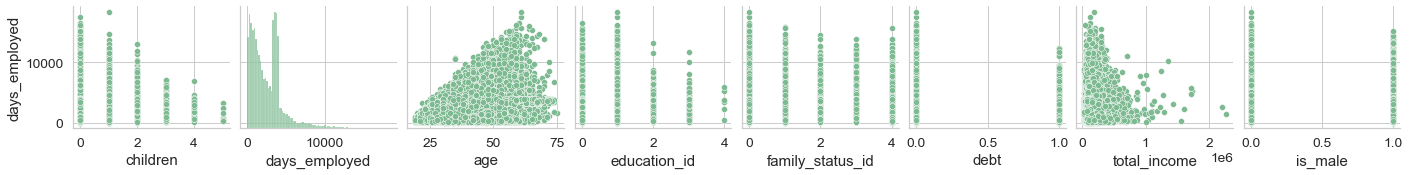

In [25]:
# для избежания лагов изменим
# формат графиков обратно на png
set_matplotlib_formats("png")
sns.pairplot(data_train, y_vars="days_employed");

Видим, что однозначных корелляций нет, однако кореллируют распределения. Например, видим, что в зависимости от детей меняется среднее значение и разброс количества дней стажа. Та же ситуация с возрастом. Возможно, это поможет улучшить нашу оценку. Забавно посмотреть на взаимосвязь между `total_income` и `days_employed` - видно, что люди с самым большим заработком имеют самый малый стаж работы, и люди с большим стажем, наоборот, в среднем имеют меньший доход. Возможно, это объясняется тем, что зачастую люди, которые не меняют работу, просто не развиваются в карьерном плане.

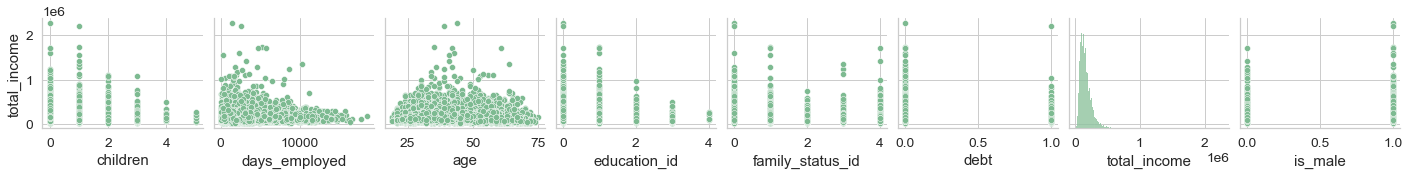

In [26]:
sns.pairplot(data_train, y_vars="total_income");

In [27]:
set_matplotlib_formats("svg")

Тут дело с корелляциями обстоит несколько хуже на мой взгляд. Забавную вещь можно заметить, если посмотреть на связь между ежемесячным заработком и уровнем образования. У людей с `education_id` равным 4, то есть люди с ученой степенью, самый низкий средний доход. Правда, их всего 6 человек.

In [28]:
data_train.corr()[["days_employed", "total_income"]]

,days_employed,total_income
children,-0.113486,0.031307
days_employed,1.000000,-0.006242
age,0.381056,-0.055580
education_id,0.004695,-0.178885
family_status_id,-0.066519,-0.009147
debt,-0.075322,-0.012475
total_income,-0.006242,1.000000
is_male,-0.119706,0.179857


Больших корелляций действительно нигде нет. Правда, выше не учитывается столбец `purpose_category`. Я поэкспериментировал и сравнил линейную регрессию, SVR и градиентный бустинг на решающих деревьях. Градиентный бустинг везде показал себя лучше, так что будем использовать его для заполнения пропусков.

In [29]:
cat_columns = ["education_id", "family_status_id", "income_type", "purpose_category"]

ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

preprocessor = ColumnTransformer(
    [("ordinal_encoder", ordinal_encoder, cat_columns)], remainder="passthrough", sparse_threshold=0, n_jobs=-1
)

In [30]:
model = Pipeline([("preprocessor", preprocessor), ("regressor", HistGradientBoostingRegressor())])

In [31]:
cross_val_score(model, X_train, Y_days, n_jobs=-1)

array([0.18669021, 0.16938895, 0.17034694, 0.17038489, 0.16343453])

Как видим, в предсказании стажа нам удалось в среднем на 17% снизить квадрат ошибки по сравнению с простым средним. Чтобы сэкономить время, я не стал делать полноценные grid и random search по параметрам и вложенную кросс-валидацию. Немного поэкспериментировав, я пришел к выводу, что градиентный бустинг дает резльтаты выше, чем линейная регрессия и SVR, и что выбор различных гиперпараметров не особо меняет результаты. Впрочем, не особо удивительно, так как задача изначально не предполагала точного результата.

In [32]:
cross_val_score(model, X_train, Y_income, n_jobs=-1)

array([0.1151487 , 0.08822364, 0.11495791, 0.12302383, 0.11595383])

Как ни странно, в предсказании зарплаты результаты оказались хуже. Однако все равно лучше, чем простое среднее. Снова градиентный бустинг на решающих деревьях показал себя лучше, чем остальные модели. Так что будем использовать его для заполнения пропусков.

In [33]:
model.fit(X_train, Y_days)
Y_days_predicted = model.predict(X_predict)
data.loc[data["days_employed"].isna(), "days_employed"] = Y_days_predicted

In [34]:
model.fit(X_train, Y_income)
Y_income_predicted = model.predict(X_predict)
data.loc[data["total_income"].isna(), "total_income"] = Y_income_predicted

На самом деле, можно было бы сделать еще лучше. Так как пропуски в столбцах совпадали, мы не могли использовать информацию из одного столбца для заполнения пропусков в другом. Но в принципе можно было сделать так: предсказать значения в одном из столбцов, а потом использовать эту информацию для более точного предсказания значений в другом столбце. Но не думаю, что результат бы сильно улучшился, так как заполненные значения в первом столбце не сильно бы отличались от среднего, и следовательно, несли бы малую предсказательную силу.

In [35]:
print("Mean / Median")
print("Y_days:", round(Y_days.mean(), 3), "/", round(Y_days.median(), 3))
print("Y_days_predicted:", round(Y_days_predicted.mean(), 3), "/", round(np.median(Y_days_predicted), 3))

Mean / Median
Y_days: 2583.922 / 2194.221
Y_days_predicted: 2577.879 / 2512.422


In [36]:
print("Mean / Median")
print("Y_income:", round(Y_income.mean(), 3), "/", round(Y_income.median(), 3))
print("Y_income_predicted:", round(Y_income_predicted.mean(), 3), "/", round(np.median(Y_income_predicted), 3))

Mean / Median
Y_income: 167422.302 / 145017.938
Y_income_predicted: 169583.517 / 164610.855


На здравый смысл результаты проверку проходят.

In [37]:
data["days_employed"] = data["days_employed"].astype(int)
data["total_income"] = data["total_income"].astype(int)
data_num = data.select_dtypes(exclude=object)
data[data_num.columns] = data_num.apply(pd.to_numeric, downcast="integer")

In [38]:
data

,children,days_employed,age,education_id,family_status_id,income_type,debt,total_income,is_male,purpose_category
0,1,8437,42,0,0,сотрудник,0,253875,0,операции с недвижимостью
1,1,4024,36,1,0,сотрудник,0,112080,0,операции с автомобилем
2,0,5623,33,1,0,сотрудник,0,145885,1,операции с недвижимостью
3,3,4124,32,1,0,сотрудник,0,267628,1,получение образования
4,0,3402,53,1,1,пенсионер,0,158616,0,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...
21176,1,4529,43,1,1,компаньон,0,224791,0,операции с недвижимостью
21177,0,3439,67,1,0,пенсионер,0,155999,0,операции с автомобилем
21178,1,2113,38,1,1,сотрудник,1,89672,1,операции с недвижимостью
21179,3,3112,38,1,0,сотрудник,1,244093,1,операции с автомобилем


После заполнения пропусков разобъем людей по уровню дохода.

In [39]:
data["total_income_category"] = pd.cut(
    data["total_income"],
    [0, 30000, 50000, 200000, 1000000, float("inf")],
    labels=["E", "D", "C", "B", "A"],
    include_lowest=True,
)
data.sample(5)

,children,days_employed,age,education_id,family_status_id,income_type,debt,total_income,is_male,purpose_category,total_income_category
18951,2,274,30,0,0,сотрудник,0,242011,0,операции с автомобилем,B
15891,0,2729,35,0,0,компаньон,0,82417,0,операции с недвижимостью,C
5702,0,1158,50,1,1,сотрудник,0,157403,1,проведение свадьбы,C
20502,1,3982,40,1,0,пенсионер,0,39107,0,получение образования,D
2480,0,2651,26,1,0,компаньон,0,145461,1,операции с недвижимостью,C


# Исследовательский анализ данных

## Количество детей

In [40]:
debt_by_children = data.groupby("children").agg({"debt": ["count", "mean"]}).droplevel(0, axis=1)
debt_by_children.rename(columns={"mean": "debt_percent"}, inplace=True)
debt_by_children["debt_percent"] *= 100
debt_by_children.sort_values(by="debt_percent", ascending=False, inplace=True)
debt_by_children

,count,debt_percent
children,,
4,40,10.000000
2,2118,9.537299
1,4806,9.259259
3,328,8.231707
0,13880,7.644092
5,9,0.000000


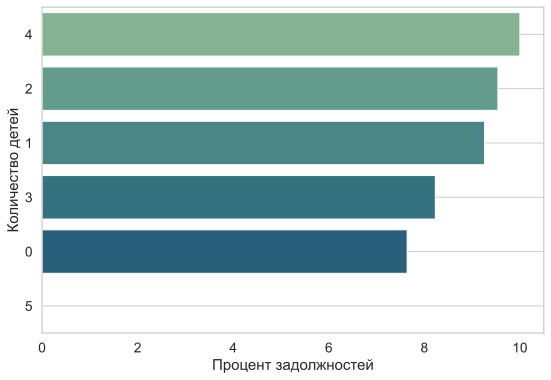

In [41]:
ax = sns.barplot(
    x=debt_by_children["debt_percent"].round(2), y=debt_by_children.index, orient="h", order=debt_by_children.index
)
ax.set(xlabel="Процент задолжностей", ylabel="Количество детей")
ax.grid(False)
ax.yaxis.grid(True)

Вообще говоря, просто так брать и группировать данные по нужному критерию можно делать только если мы считаем, что выборка достаточно репрезентативна. Например, мы видим, что у людей с 5 детьми никогда не было задолжностей. Однако их там всего 9 человек - выборка нерепрезентативна. Так же мало людей с 3 и 4 детьми. Чтобы получить большую уверенность в выводах, лучше взять больше данных. В целом видим, что чем больше детей, тем больше вероятность задолжности. Возможно, люди с меньшим количеством детей имеют больше свободных финансов и, следовательно, являются более надежными платильщиками. Однако есть выброс, когда количество детей равно 3, там количество задолжностей резко падает. Но опять же, там всего 330 точек данных.

## Семейное положение

In [42]:
debt_by_family_status = data.groupby("family_status_id").agg({"debt": ["count", "mean"]}).droplevel(0, axis=1)
debt_by_family_status = family_status_df.merge(debt_by_family_status, on="family_status_id")
debt_by_family_status.rename(columns={"mean": "debt_percent"}, inplace=True)
debt_by_family_status["debt_percent"] *= 100
debt_by_family_status.sort_values(by="debt_percent", ascending=False, inplace=True)
debt_by_family_status

,family_status_id,family_status,count,debt_percent
4,4,Не женат / не замужем,2790,9.820789
1,1,гражданский брак,4137,9.378777
0,0,женат / замужем,12114,7.668813
3,3,в разводе,1193,7.124895
2,2,вдовец / вдова,947,6.652587


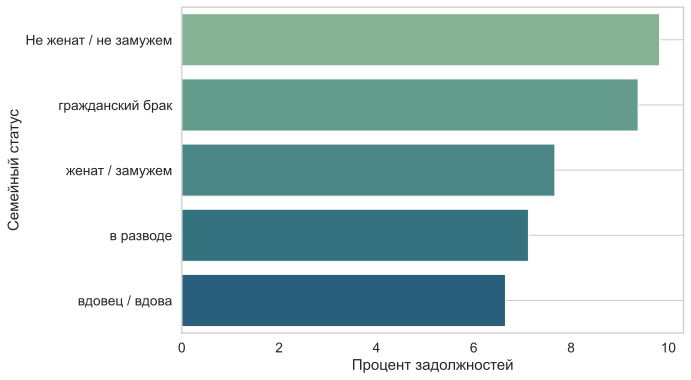

In [43]:
ax = sns.barplot(x=debt_by_family_status["debt_percent"], y=debt_by_family_status["family_status"])
ax.set(xlabel="Процент задолжностей", ylabel="Семейный статус")
ax.grid(False)
ax.yaxis.grid(True)

Можно видеть, что люди, которые были в браке (женаты, разведены, или вдовцы) реже имеют задолжности, в то время как люди, не имеющие отношений или не подкреплявшие их на бумаге, чаще уходят в долги. Возможно, люди, которые решились на брак, более ответственные.

## Уровень дохода

In [44]:
debt_by_income = data.groupby("total_income_category").agg({"debt": ["count", "mean"]}).droplevel(0, axis=1)
debt_by_income.rename(columns={"mean": "debt_percent"}, inplace=True)
debt_by_income["debt_percent"] *= 100
debt_by_income

,count,debt_percent
total_income_category,,
E,22,9.090909
D,350,6.000000
C,15407,8.697345
B,5377,6.955551
A,25,8.000000


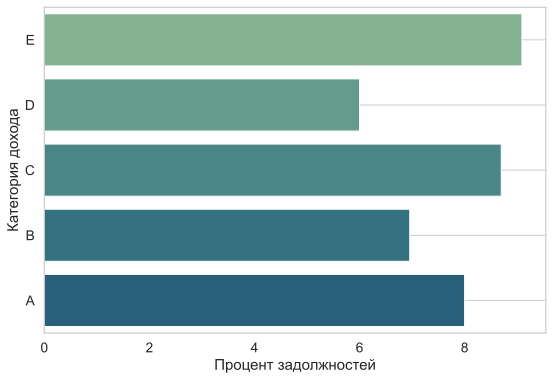

In [45]:
ax = sns.barplot(x=debt_by_income["debt_percent"], y=debt_by_income.index)
ax.set(xlabel="Процент задолжностей", ylabel="Категория дохода")
ax.grid(False)
ax.yaxis.grid(True)

Тут неоднозначные результаты. Вопреки ожиданиям, у людей с категорией дохода "А" не самый низкий процент задолжностей, но там всего 25 человек. Например, в категории "В" процент должников меньше. Самый высокий процент у категории "Е" - людей, доход которых меньше всего. Это возможно, потому что у них больше нестабильность в заработке - урез зарплаты, сокращение или форс мажор тут же нанесут сильный удар по платежеспособности этих людей. Но опять же, их 22 человека, сложно сделать однозначный вывод. Во всяком случае, однозначной корелляции между классом дохода и вероятности задолжности в данных нет.

## Цели кредита

In [46]:
debt_by_purpose = data.groupby("purpose_category").agg({"debt": ["count", "mean"]}).droplevel(0, axis=1)
debt_by_purpose.rename(columns={"mean": "debt_percent"}, inplace=True)
debt_by_purpose["debt_percent"] *= 100
debt_by_purpose.sort_values(by="debt_percent", ascending=False, inplace=True)
debt_by_purpose

,count,debt_percent
purpose_category,,
операции с автомобилем,4277,9.399112
получение образования,3973,9.312862
проведение свадьбы,2317,8.027622
операции с недвижимостью,10614,7.358206


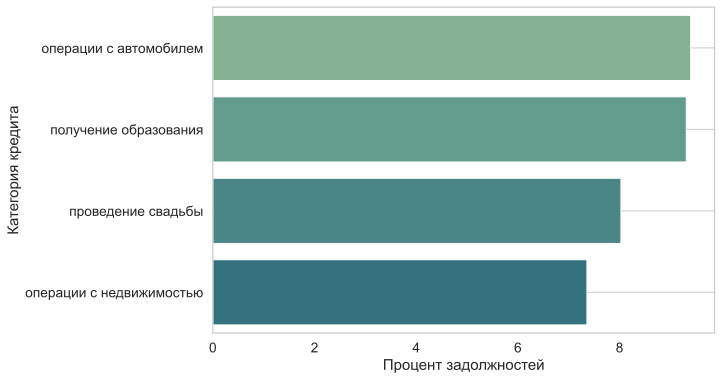

In [47]:
ax = sns.barplot(x=debt_by_purpose["debt_percent"], y=debt_by_purpose.index)
ax.set(xlabel="Процент задолжностей", ylabel="Категория кредита")
ax.grid(False)
ax.yaxis.grid(True)

Автомобилисты и те, кто решили получить образование, чаще всего оказываются в долгах. Потом идет проведение свадьбы, а наименьший процент задолжностей у операций с недвижимостью. Возможно, так получается, потому что зачастую машину покупают как "игрушку", не особо раздумывая, в результате чего потом не могут выплатить по долгам. Образование могут часто бросить на полпути и мотив продолжать выплачивать кредит угаснет. На операции с недвижимостью обычно идут уже хорошо подумав, вероятно, поэтому там процент задолжностей ниже.

# Итог

Данные о заемщиках содержали множественные неточности и ошибки. Была проведена обработка аномалий, удаление дубликатов и заполнение пропусков. По итогам исследования можно сделать выводы, что:

1. Люди с большим числом детей (от 4) чаще других не возвращают кредит вовремя


2. Люди, которые когда-либо состояли в браке, реже становятся должниками


3. Возвращение кредита в срок мало зависит от дохода клиента


4. Операции с недвижимостью наиболее безопасный тип кредита для банка. Потом идут проведение свадьбы и получение образования. Самый небезопасный кредит - на приобретение автомобиля
